Analysis Questions

1. What are the trends across Studio Ghibli films in terms of running time, release year, and Rotten Tomatoes score?
2. How do films differ by director? Which directors have the highest average Rotten Tomatoes scores and longest average running times?
3. Does a film’s cast size relate to its Rotten Tomatoes score and running time?

In [29]:
# Importing necessary libraries
import requests
import pandas as pd
import json

In [30]:
# Loading the data

films_url = "https://ghibliapi.vercel.app/films"
people_url = "https://ghibliapi.vercel.app/people"

films_data = requests.get(films_url).json()
people_data = requests.get(people_url).json()

print("Films loaded:", len(films_data))
print("People loaded:", len(people_data))


Films loaded: 22
People loaded: 57


In [46]:
# Saving raw datasets
# raw film dataset
with open("films_raw.json", "w") as f:
    json.dump(films_data, f, indent=4)

# raw people dataset
with open("people_raw.json", "w") as f:
    json.dump(people_data, f, indent=4)

In [32]:
# Structuring Jason (converting to dataframes)

films_df = pd.json_normalize(films_data)
people_df = pd.json_normalize(people_data)

print("\n films_df raw")
display(films_df.head(3))
print("\n people_df raw ")
display(people_df.head(3))

# Keeping only needed fields
films_df = films_df[[
    "id", "title", "description", "director", "producer",
    "release_date", "running_time", "rt_score", "url"
]]

people_df = people_df[[
    "id", "name", "gender", "age", "films", "url"
]]

print("\n films_df after selecting columns")
display(films_df.head(3))
print("\n people_df  after selecting columns")
display(people_df.head(3))



 films_df raw


,id,title,original_title,original_title_romanised,image,movie_banner,description,director,producer,release_date,running_time,rt_score,people,species,locations,vehicles,url
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,天空の城ラピュタ,Tenkū no shiro Rapyuta,https://image.tmdb.org/t/p/w600_and_h900_bestv...,https://image.tmdb.org/t/p/w533_and_h300_bestv...,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,[https://ghibliapi.vercel.app/people/598f7048-...,[https://ghibliapi.vercel.app/species/af3910a6...,[https://ghibliapi.vercel.app/locations/],[https://ghibliapi.vercel.app/vehicles/4e09b02...,https://ghibliapi.vercel.app/films/2baf70d1-42...
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,火垂るの墓,Hotaru no haka,https://image.tmdb.org/t/p/w600_and_h900_bestv...,https://image.tmdb.org/t/p/original/vkZSd0Lp8i...,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,89,97,[https://ghibliapi.vercel.app/people/],[https://ghibliapi.vercel.app/species/af3910a6...,[https://ghibliapi.vercel.app/locations/],[https://ghibliapi.vercel.app/vehicles/],https://ghibliapi.vercel.app/films/12cfb892-aa...
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,となりのトトロ,Tonari no Totoro,https://image.tmdb.org/t/p/w600_and_h900_bestv...,https://image.tmdb.org/t/p/original/etqr6fOOCX...,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,86,93,[https://ghibliapi.vercel.app/people/986faac6-...,[https://ghibliapi.vercel.app/species/af3910a6...,[https://ghibliapi.vercel.app/locations/],[https://ghibliapi.vercel.app/vehicles/],https://ghibliapi.vercel.app/films/58611129-2d...



 people_df raw 


,id,name,gender,age,eye_color,hair_color,films,species,url
0,267649ac-fb1b-11eb-9a03-0242ac130003,Haku,Male,12,Green,Green,[https://ghibliapi.vercel.app/films/dc2e6bd1-8...,https://ghibliapi.vercel.app/species/e2cfaa78-...,https://ghibliapi.vercel.app/people/267649ac-f...
1,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,Black,Brown,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/fe93adf2-2...
2,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,Black,Black,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/598f7048-7...



 films_df after selecting columns


,id,title,description,director,producer,release_date,running_time,rt_score,url
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,89,97,https://ghibliapi.vercel.app/films/12cfb892-aa...
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,86,93,https://ghibliapi.vercel.app/films/58611129-2d...



 people_df  after selecting columns


,id,name,gender,age,films,url
0,267649ac-fb1b-11eb-9a03-0242ac130003,Haku,Male,12,[https://ghibliapi.vercel.app/films/dc2e6bd1-8...,https://ghibliapi.vercel.app/people/267649ac-f...
1,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/people/fe93adf2-2...
2,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/people/598f7048-7...


In [33]:
# First cleaning film data

# Converting numeric fields
films_df["running_time"] = pd.to_numeric(films_df["running_time"], errors="coerce")
films_df["rt_score"] = pd.to_numeric(films_df["rt_score"], errors="coerce")
films_df["release_date"] = pd.to_numeric(films_df["release_date"], errors="coerce")

# Dropping films with missing critical fields
films_df = films_df.dropna(subset=["running_time", "rt_score"])

print(" films_df after cleaning")
display(films_df.head(5))

 films_df after cleaning


,id,title,description,director,producer,release_date,running_time,rt_score,url
0,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...
1,12cfb892-aac0-4c5b-94af-521852e46d6a,Grave of the Fireflies,"In the latter part of World War II, a boy and ...",Isao Takahata,Toru Hara,1988,89,97,https://ghibliapi.vercel.app/films/12cfb892-aa...
2,58611129-2dbc-4a81-a72f-77ddfc1b1b49,My Neighbor Totoro,Two sisters move to the country with their fat...,Hayao Miyazaki,Hayao Miyazaki,1988,86,93,https://ghibliapi.vercel.app/films/58611129-2d...
3,ea660b10-85c4-4ae3-8a5f-41cea3648e3e,Kiki's Delivery Service,"A young witch, on her mandatory year of indepe...",Hayao Miyazaki,Hayao Miyazaki,1989,102,96,https://ghibliapi.vercel.app/films/ea660b10-85...
4,4e236f34-b981-41c3-8c65-f8c9000b94e7,Only Yesterday,"It’s 1982, and Taeko is 27 years old, unmarrie...",Isao Takahata,Toshio Suzuki,1991,118,100,https://ghibliapi.vercel.app/films/4e236f34-b9...


In [34]:
# cleaning people data

# Ensuring 'films' is always a list
people_df["films"] = people_df["films"].apply(
    lambda x: x if isinstance(x, list) else []
)

# Expanding rows so each row corresponds to a single film per person
people_exploded = people_df.explode("films")

print("\n people_df after cleaning and exploding ")
display(people_exploded.head(5))



 people_df after cleaning and exploding 


,id,name,gender,age,films,url
0,267649ac-fb1b-11eb-9a03-0242ac130003,Haku,Male,12,https://ghibliapi.vercel.app/films/dc2e6bd1-81...,https://ghibliapi.vercel.app/people/267649ac-f...
1,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/fe93adf2-2...
2,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/598f7048-7...
3,3bc0b41e-3569-4d20-ae73-2da329bf0786,Captain Dola,Female,60,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/3bc0b41e-3...
4,abe886e7-30c8-4c19-aaa5-d666e60d14de,Romska Palo Ul Laputa,Male,33,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/abe886e7-3...


In [35]:
# joing flilms with people

joined_df = people_exploded.merge(
    films_df,
    left_on="films",
    right_on="url",
    how="inner"
)

print("\n Joined DF sample")
display(joined_df.head(5))


# Calculating cast size per film
cast_size = joined_df.groupby("title")["name"].count().reset_index()
cast_size.columns = ["title", "cast_size"]

# Merging back into films_df
films_joined = films_df.merge(cast_size, on="title", how="left")
films_joined["cast_size"] = films_joined["cast_size"].fillna(0)

print("\n Films with cast size added ")
display(films_joined[["title", "cast_size"]].head(10))


 Joined DF sample


,id_x,name,gender,age,films,url_x,id_y,title,description,director,producer,release_date,running_time,rt_score,url_y
0,267649ac-fb1b-11eb-9a03-0242ac130003,Haku,Male,12,https://ghibliapi.vercel.app/films/dc2e6bd1-81...,https://ghibliapi.vercel.app/people/267649ac-f...,dc2e6bd1-8156-4886-adff-b39e6043af0c,Spirited Away,Spirited Away is an Oscar winning Japanese ani...,Hayao Miyazaki,Toshio Suzuki,2001,124,97,https://ghibliapi.vercel.app/films/dc2e6bd1-81...
1,fe93adf2-2f3a-4ec4-9f68-5422f1b87c01,Pazu,Male,13,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/fe93adf2-2...,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...
2,598f7048-74ff-41e0-92ef-87dc1ad980a9,Lusheeta Toel Ul Laputa,Female,13,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/598f7048-7...,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...
3,3bc0b41e-3569-4d20-ae73-2da329bf0786,Captain Dola,Female,60,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/3bc0b41e-3...,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...
4,abe886e7-30c8-4c19-aaa5-d666e60d14de,Romska Palo Ul Laputa,Male,33,https://ghibliapi.vercel.app/films/2baf70d1-42...,https://ghibliapi.vercel.app/people/abe886e7-3...,2baf70d1-42bb-4437-b551-e5fed5a87abe,Castle in the Sky,The orphan Sheeta inherited a mysterious cryst...,Hayao Miyazaki,Isao Takahata,1986,124,95,https://ghibliapi.vercel.app/films/2baf70d1-42...



 Films with cast size added 


,title,cast_size
0,Castle in the Sky,14.0
1,Grave of the Fireflies,0.0
2,My Neighbor Totoro,10.0
3,Kiki's Delivery Service,6.0
4,Only Yesterday,0.0
5,Porco Rosso,1.0
6,Pom Poko,0.0
7,Whisper of the Heart,2.0
8,Princess Mononoke,10.0
9,My Neighbors the Yamadas,0.0


In [36]:
# Q1


film_summary = films_df[[
    "title", "release_date", "running_time", "rt_score"
]].sort_values("release_date")

film_summary.to_csv("summary_question1_films.csv", index=False)

print("Film Summary:")
display(film_summary.head())

Film Summary:


,title,release_date,running_time,rt_score
0,Castle in the Sky,1986,124,95
1,Grave of the Fireflies,1988,89,97
2,My Neighbor Totoro,1988,86,93
3,Kiki's Delivery Service,1989,102,96
4,Only Yesterday,1991,118,100


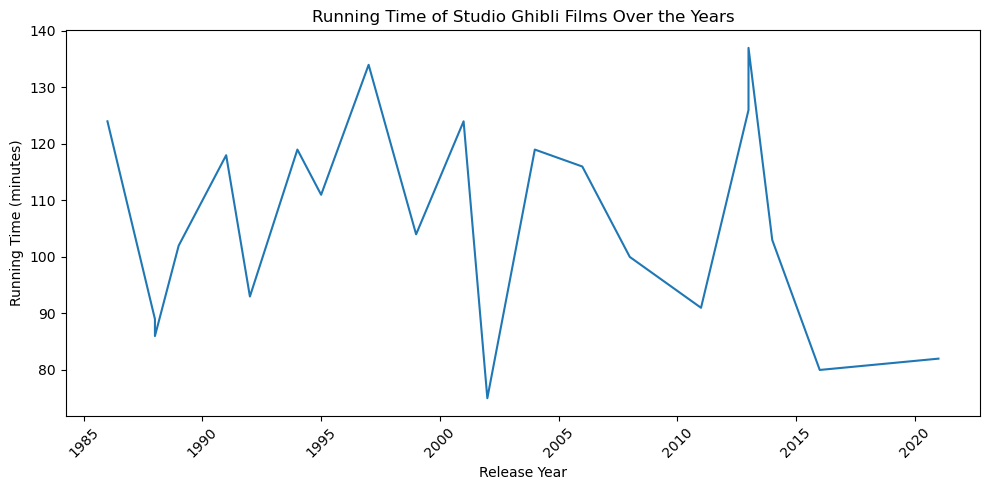

In [37]:
# Q1 graph 1: Running time by release year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(film_summary["release_date"], film_summary["running_time"])
plt.title("Running Time of Studio Ghibli Films Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Running Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


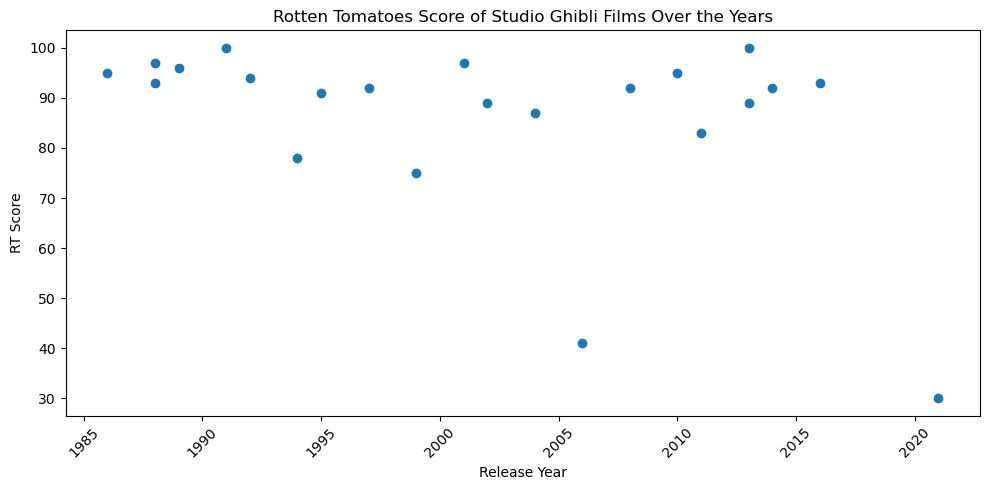

In [38]:
# Q1 graph 2: Rotten tomatoes score by release year
plt.figure(figsize=(10, 5))
plt.scatter(film_summary["release_date"], film_summary["rt_score"])
plt.title("Rotten Tomatoes Score of Studio Ghibli Films Over the Years")
plt.xlabel("Release Year")
plt.ylabel("RT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For this question, I wanted to understand how Studio Ghibli films vary in terms of running time, release year, and Rotten Tomatoes score. To do that, I first cleaned the film dataset so the running time, release year, and RT score were all in numeric form. Then I created a simple dataframe that only included the fields needed for the analysis: the film title, its release year, running time, and RT score.

To help visualize everything, I created two graphs. The first one shows how the running time changes across release years. The second one plots the Rotten Tomatoes scores by release year. These graphs make it easy to see if the films are getting longer or shorter over time, and whether their audience reception has changed. From the running time graph, we can see that most movies stay within a similar length. Studio Ghibli doesn’t drastically change how long their films are, no matter the decade. From the RT score graph, the main takeaway is that the movies consistently perform very well with critics. Their scores stay high throughout the years without any major dips or patterns.

So, the overall answer to Q1 is that Studio Ghibli films have been very steady over time. Their running times don’t show extreme variation, and their Rotten Tomatoes scores remain strong across generations. The studio seems to have found a rhythm that works, and both the data and the visualizations reflect that consistency.

In [39]:
# Q2

director_summary = films_df.groupby("director").agg(
    avg_rt_score=("rt_score", "mean"),
    avg_running_time=("running_time", "mean"),
    film_count=("title", "count")
).reset_index()

director_summary.to_csv("summary_question2_directors.csv", index=False)

print("Director Summary :")
display(director_summary)

Director Summary :


,director,avg_rt_score,avg_running_time,film_count
0,Gorō Miyazaki,51.333333,96.333333,3
1,Hayao Miyazaki,92.777778,112.000000,9
2,Hiromasa Yonebayashi,93.500000,98.500000,2
3,Hiroyuki Morita,89.000000,75.000000,1
4,Isao Takahata,90.000000,113.400000,5
5,Michaël Dudok de Wit,93.000000,80.000000,1
6,Yoshifumi Kondō,91.000000,111.000000,1


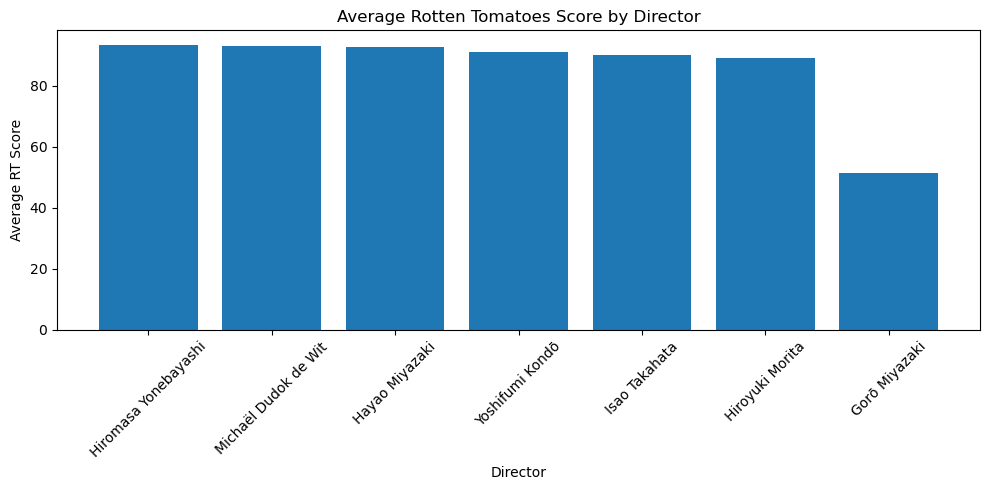

In [40]:
# Q2 graph 1: Average RT score per director

import matplotlib.pyplot as plt
director_sorted = director_summary.sort_values("avg_rt_score", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(director_sorted["director"], director_sorted["avg_rt_score"])
plt.title("Average Rotten Tomatoes Score by Director")
plt.xlabel("Director")
plt.ylabel("Average RT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


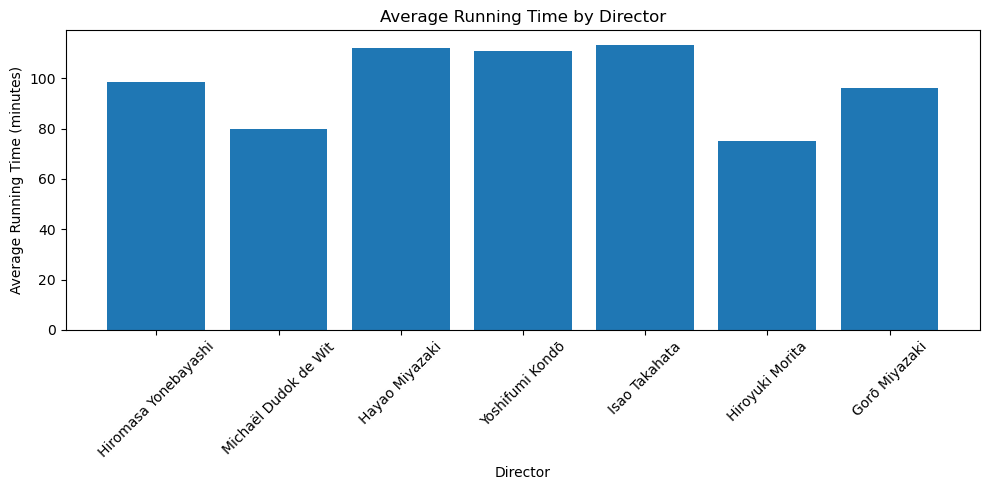

In [24]:
#Q3 graph 2: Average running time per director

plt.figure(figsize=(10,5))
plt.bar(director_sorted["director"], director_sorted["avg_running_time"])
plt.title("Average Running Time by Director")
plt.xlabel("Director")
plt.ylabel("Average Running Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


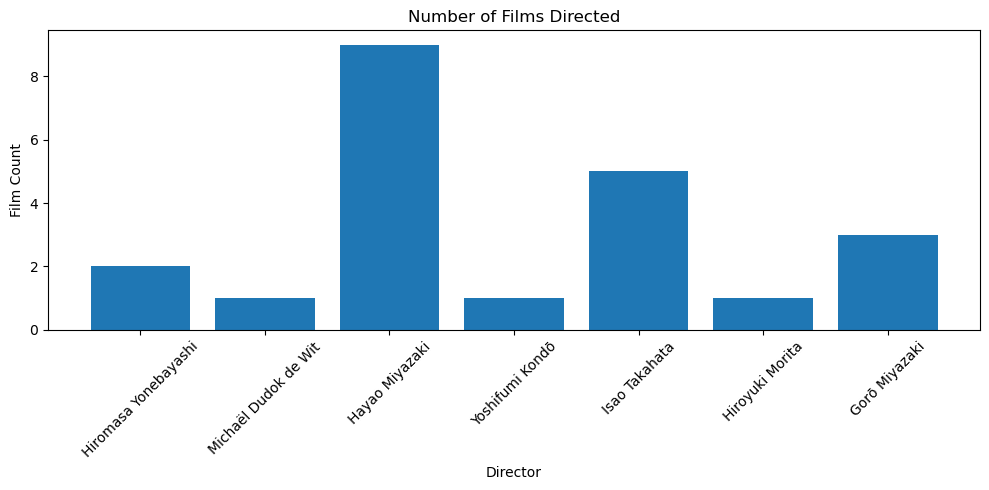

In [41]:
# Q2 graph 3: Number of films per director

plt.figure(figsize=(10,5))
plt.bar(director_sorted["director"], director_sorted["film_count"])
plt.title("Number of Films Directed")
plt.xlabel("Director")
plt.ylabel("Film Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For this question, I wanted to see how Studio Ghibli directors differ from each other based on three things:
their films’ average Rotten Tomatoes score, their average running time, and how many films each director has made.

To do this, I grouped the film dataset by the director’s name and calculated the average RT score, the average running time, and the total number of films for each director. This gave me a clean summary table where each row represents one director and their overall statistics.

I then created three visualizations to help interpret the results more clearly.

The first graph shows the average Rotten Tomatoes score for each director. This makes it easy to compare which directors have the highest critical reception on average. The second graph shows the average running time of their films, letting us see whether some directors tend to create longer movies than others. The third graph simply shows how many films each person directed, which helps give context to the averages we calculated.

From these graphs, we can see that some directors like Hayao Miyazaki consistently have strong RT scores paired with several well-known films. Other directors may have fewer movies, which can make their averages shift more noticeably. The running time chart also shows that most directors stick to a similar length range, with only slight differences in their averages.

Overall, the analysis shows that while all Ghibli directors contribute to the studio’s reputation, their film outputs and average ratings vary in interesting ways. The visualizations help highlight who directs the most films, whose movies tend to run longer, and which directors have the strongest critical scores on average.

In [42]:
# Q3

cast_comparison = films_joined[[
    "title", "cast_size", "running_time", "rt_score"
]]

cast_comparison.to_csv("summary_question3_cast.csv", index=False)

print("Cast Size Comparison :")
display(cast_comparison.head())

Cast Size Comparison :


,title,cast_size,running_time,rt_score
0,Castle in the Sky,14.0,124,95
1,Grave of the Fireflies,0.0,89,97
2,My Neighbor Totoro,10.0,86,93
3,Kiki's Delivery Service,6.0,102,96
4,Only Yesterday,0.0,118,100


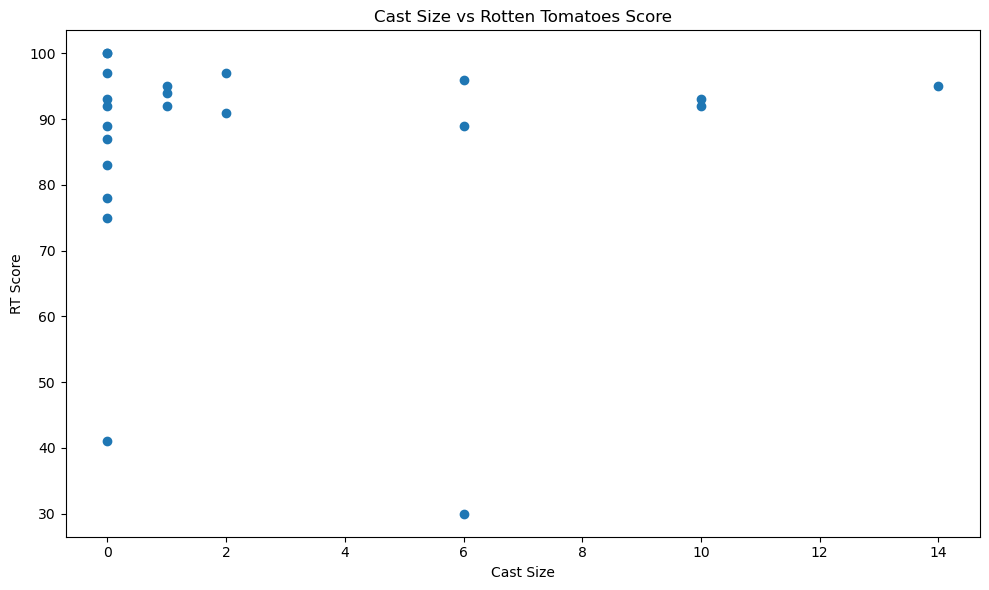

In [43]:
# Q3 graph 1: Cast size vs RT score

import matplotlib.pyplot as plt
cast_sorted = cast_comparison.sort_values("cast_size")

plt.figure(figsize=(10, 6))
plt.scatter(cast_sorted["cast_size"], cast_sorted["rt_score"])
plt.title("Cast Size vs Rotten Tomatoes Score")
plt.xlabel("Cast Size")
plt.ylabel("RT Score")
plt.tight_layout()
plt.show()

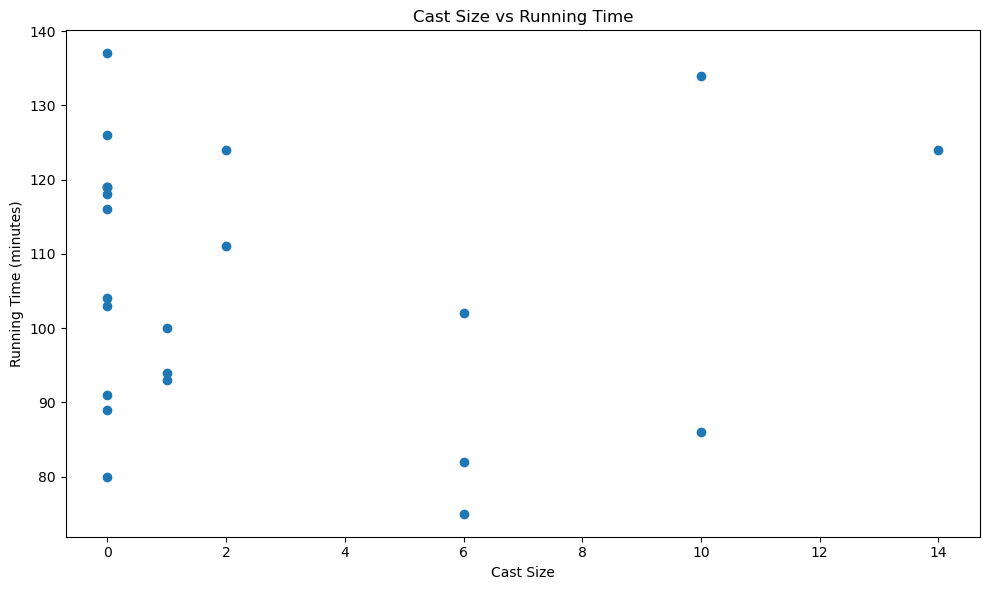

In [44]:
# Q3 graph 2: Cast size vs running time

plt.figure(figsize=(10, 6))
plt.scatter(cast_sorted["cast_size"], cast_sorted["running_time"])
plt.title("Cast Size vs Running Time")
plt.xlabel("Cast Size")
plt.ylabel("Running Time (minutes)")
plt.tight_layout()
plt.show()

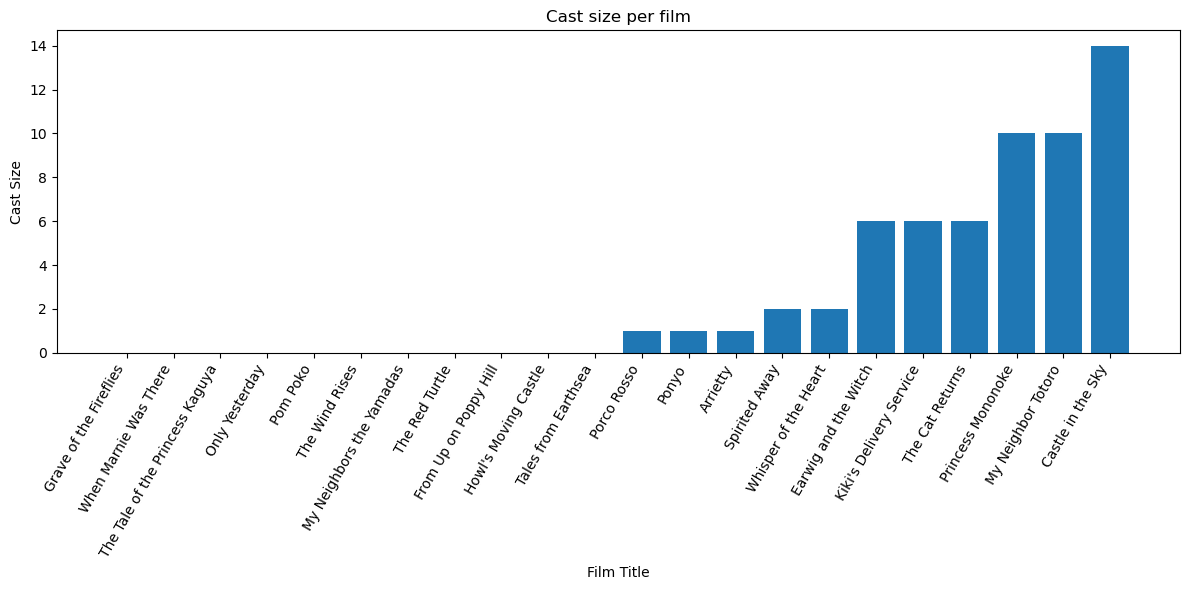

In [47]:
# Q3 graph 3: Cast size by film

plt.figure(figsize=(12, 6))
plt.bar(cast_sorted["title"], cast_sorted["cast_size"])
plt.title("Cast size per film")
plt.xlabel("Film Title")
plt.ylabel("Cast Size")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

For this question, I wanted to explore how the number of characters in a movie (its cast size) relates to things like the film’s running time and its Rotten Tomatoes score. To do this, I used the joined dataset from earlier, where each person is linked to the film they appear in. I counted how many people are associated with each film, which gave me a cast size value for every movie. Then I combined that information with the film’s running time and RT score to create a single dataset for this analysis.

To understand the relationships, I created three graphs. The first one shows cast size versus RT score. The second graph shows cast size versus running time. These scatter plots help show whether bigger casts tend to lead to longer movies or better reviews, or if there isn’t much of a pattern. The third graph is a simple bar chart that displays the cast size for each film individually, which helps visualize how different movies compare at a glance.

From these graphs, there doesn’t appear to be a strong relationship between cast size and Rotten Tomatoes score. Films with large casts don’t necessarily score higher or lower than films with smaller casts. The same is true for running time — movies with more characters aren’t always longer, and shorter films sometimes have surprisingly large casts. This suggests that Studio Ghibli’s storytelling style doesn’t depend heavily on how many characters are in the movie. Instead, the studio seems to focus more on narrative depth and world-building, not the size of the cast.

Overall, Q3 shows that cast size isn’t a strong predictor of film length or critical reception. The visualizations help highlight that Ghibli films vary in cast size, but that variation doesn’t strongly affect their runtime or how audiences rate them.